<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Co2_Emissions_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

DATA EXTRACTION

---

In [ ]:
co2 = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/Co2_Emissions_by_Sectors.csv")
co2.head(2), co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Industry_Type                         17686 non-null  object 
 1   Region                                17686 non-null  object 
 2   Country                               17686 non-null  object 
 3   Year                                  17686 non-null  int64  
 4   Co2_Emissions_MetricTons              17686 non-null  float64
 5   Energy_Consumption_TWh                17686 non-null  float64
 6   Automobile_Co2_Emissions_MetricTons   17686 non-null  float64
 7   Industrial_Co2_Emissions_MetricTons   17686 non-null  float64
 8   Agriculture_Co2_Emissions_MetricTons  17686 non-null  float64
 9   Domestic_Co2_Emissions_MetricTons     17686 non-null  float64
 10  Population_Millions                   17686 non-null  float64
 11  GDP_Billion_USD

(  Industry_Type         Region  Country  Year  Co2_Emissions_MetricTons  \
 0  Construction  North America   Brazil  2010                     89.13   
 1        Mining         Europe  Germany  2006                    224.81   
 
    Energy_Consumption_TWh  Automobile_Co2_Emissions_MetricTons  \
 0                   90.14                                98.37   
 1                  931.70                                10.81   
 
    Industrial_Co2_Emissions_MetricTons  Agriculture_Co2_Emissions_MetricTons  \
 0                               118.36                                 31.41   
 1                                66.73                                 39.45   
 
    Domestic_Co2_Emissions_MetricTons  Population_Millions  GDP_Billion_USD  \
 0                               0.77               941.06         13096.32   
 1                               0.21              1421.94         24337.71   
 
    Urbanization_Percentage  Renewable_Energy_Percentage  \
 0                    5

DATA ANALYSIS

---

In [ ]:
sns.set()

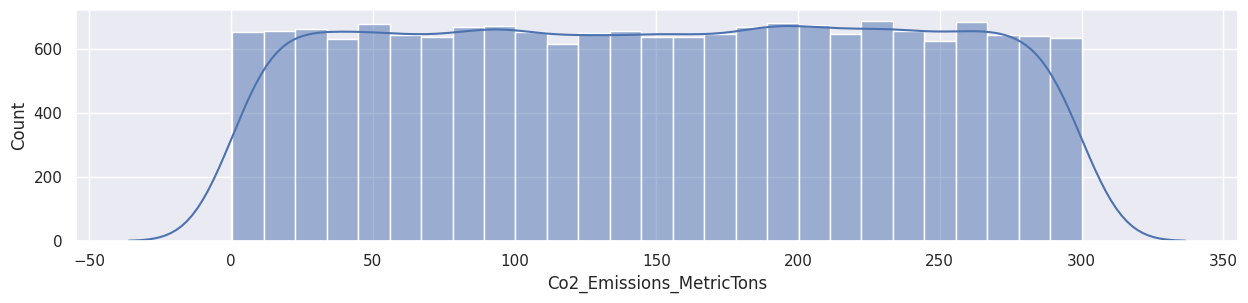

In [ ]:
plt.figure(figsize=(15,3))
sns.histplot(co2['Co2_Emissions_MetricTons'], kde=True, kde_kws=dict(cut=3))
plt.show()

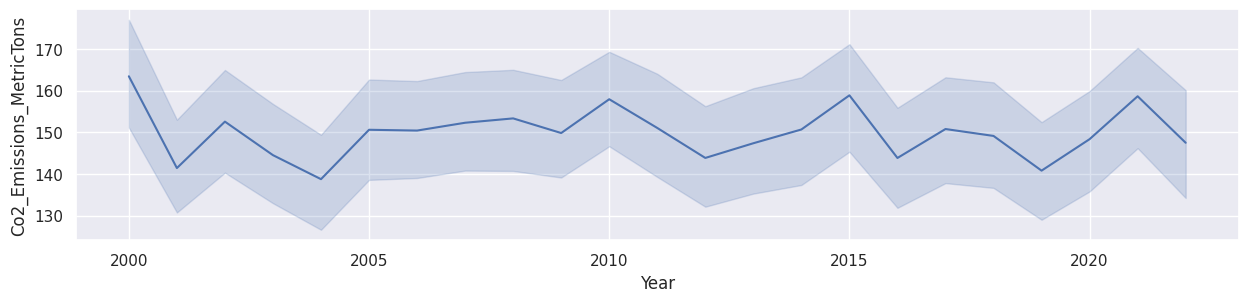

In [ ]:
plt.figure(figsize=(15,3))
Industrial = co2.query("Industry_Type == 'Energy'")
sns.lineplot(data=Industrial, y='Co2_Emissions_MetricTons', x='Year')
plt.show()

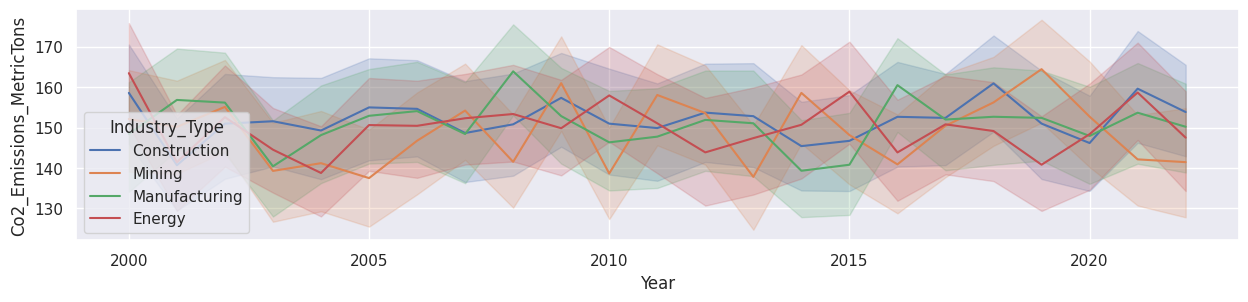

In [ ]:
plt.figure(figsize=(15,3))
sns.lineplot(data=co2, y='Co2_Emissions_MetricTons', x='Year', hue='Industry_Type')
plt.show()

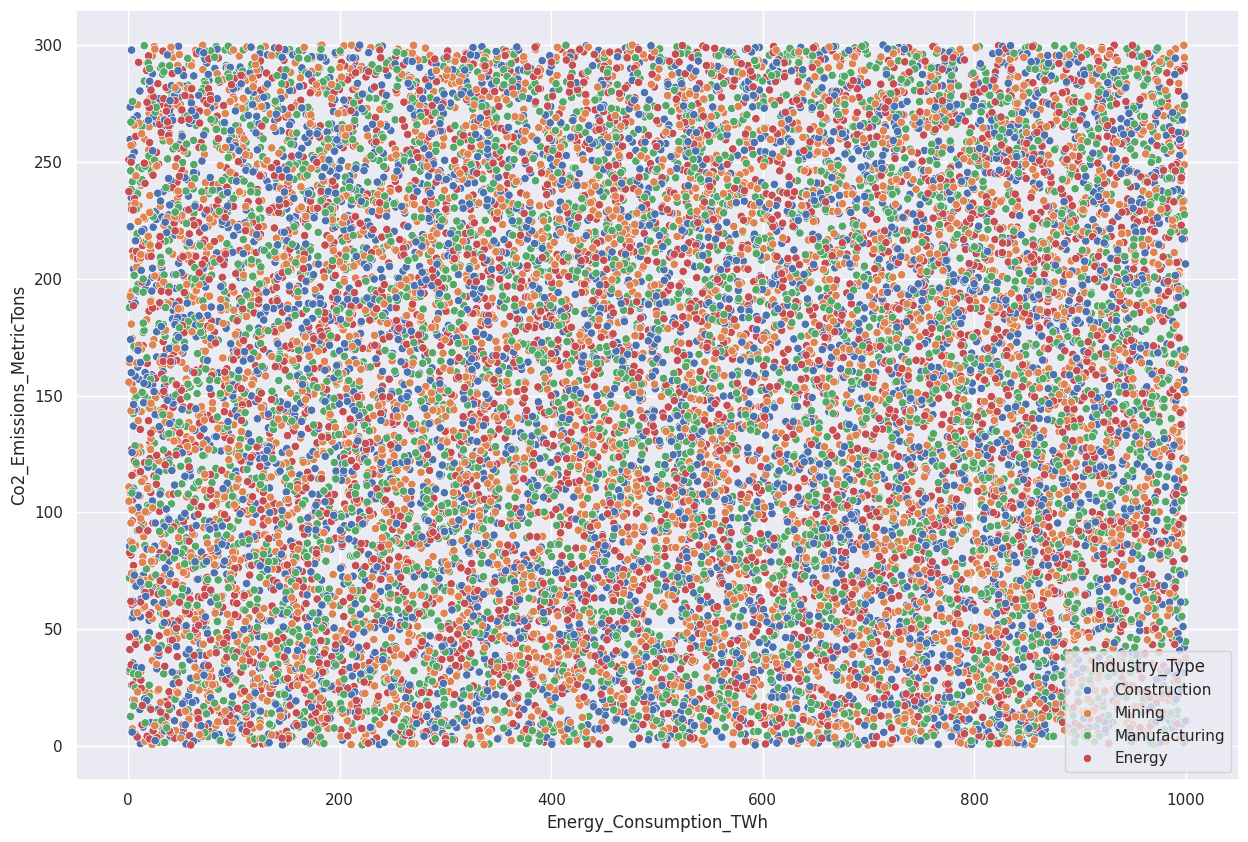

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=co2, y='Co2_Emissions_MetricTons', x='Energy_Consumption_TWh', hue='Industry_Type')
plt.show()

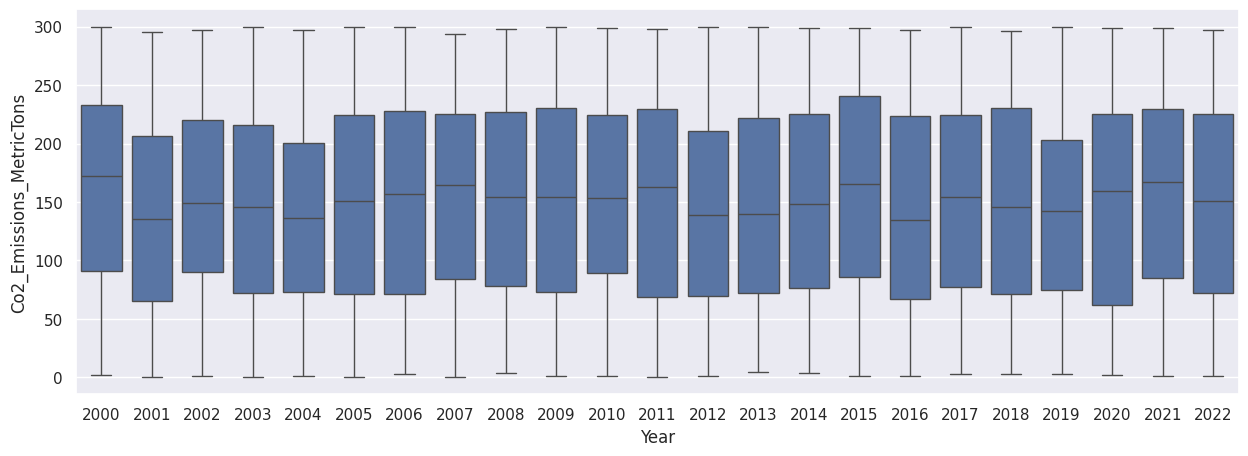

In [ ]:
plt.figure(figsize=(15,5))
Industrial = co2.query("Industry_Type == 'Energy'")
sns.boxplot(data=Industrial, y='Co2_Emissions_MetricTons', x='Year')
plt.show()

DATA PREPROCESSING

---

In [ ]:
enc=LabelEncoder()

obj = co2.select_dtypes(include='object').columns
for i in obj:
  co2[i] = enc.fit_transform(co2[i])
co2.head(5)

,Industry_Type,Region,Country,Year,Co2_Emissions_MetricTons,Energy_Consumption_TWh,Automobile_Co2_Emissions_MetricTons,Industrial_Co2_Emissions_MetricTons,Agriculture_Co2_Emissions_MetricTons,Domestic_Co2_Emissions_MetricTons,Population_Millions,GDP_Billion_USD,Urbanization_Percentage,Renewable_Energy_Percentage,Industrial_Growth_Percentage,Transport_Growth_Percentage
0,0,3,1,2010,89.13,90.14,98.37,118.36,31.41,0.77,941.06,13096.32,52.79,7.78,11.17,2.93
1,3,2,4,2006,224.81,931.70,10.81,66.73,39.45,0.21,1421.94,24337.71,50.18,31.52,13.34,9.30
2,2,5,6,2017,179.72,255.14,55.36,111.67,1.25,4.97,522.75,24523.17,65.22,5.91,-9.88,4.77
3,0,2,5,2018,23.28,887.29,78.99,123.60,46.81,13.77,1304.60,12616.18,23.69,7.52,-0.64,8.21
4,0,0,3,2013,124.54,923.03,65.93,52.32,35.67,13.91,1437.68,4476.00,94.64,8.54,5.98,0.84


In [ ]:
corr = co2.corr()

print(corr['Co2_Emissions_MetricTons'].sort_values(ascending=False).round(3)*100)

Co2_Emissions_MetricTons                100.0
Domestic_Co2_Emissions_MetricTons         1.4
Population_Millions                       1.4
Energy_Consumption_TWh                    1.2
Industrial_Growth_Percentage              0.8
Industrial_Co2_Emissions_MetricTons       0.7
GDP_Billion_USD                           0.7
Transport_Growth_Percentage               0.6
Year                                      0.3
Renewable_Energy_Percentage               0.0
Region                                   -0.2
Country                                  -0.4
Urbanization_Percentage                  -0.8
Agriculture_Co2_Emissions_MetricTons     -0.9
Automobile_Co2_Emissions_MetricTons      -0.9
Industry_Type                            -1.1
Name: Co2_Emissions_MetricTons, dtype: float64


MACHINE LEARNING MODEL BUILDING

---

In [ ]:
X = co2.drop('Co2_Emissions_MetricTons', axis=1)
y = co2['Co2_Emissions_MetricTons']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rg = RandomForestRegressor(n_estimators=100, random_state=42)
rg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

MODEL EVALUATION

---

In [ ]:
test_pred = rg.predict(X_test)
acc_score = r2_score(y_test, test_pred)
print(f"Accuracy score for test is {acc_score}")

importance = rg.feature_importances_.round(3)*100
columns = X.columns
feature_importances = pd.DataFrame({'Feature': columns,
                                   'Importance': importance}).sort_values(by='Importance', ascending=False)
print('\nFeature Importance')
print(feature_importances)

Accuracy score for test is -0.02990957797312377

Feature Importance
                                 Feature  Importance
9                    Population_Millions         8.1
4                 Energy_Consumption_TWh         8.0
7   Agriculture_Co2_Emissions_MetricTons         7.9
8      Domestic_Co2_Emissions_MetricTons         7.9
10                       GDP_Billion_USD         7.9
11               Urbanization_Percentage         7.9
5    Automobile_Co2_Emissions_MetricTons         7.8
6    Industrial_Co2_Emissions_MetricTons         7.8
12           Renewable_Energy_Percentage         7.8
13          Industrial_Growth_Percentage         7.8
14           Transport_Growth_Percentage         7.6
3                                   Year         5.1
2                                Country         3.4
1                                 Region         2.8
0                          Industry_Type         2.0
